In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
from sklearn import metrics

## Data Understanding        

In [2]:
housePrice = pd.read_csv('train.csv', keep_default_na=False, low_memory=False)

housePrice.shape

(1460, 81)

In [3]:
# iterate over each row in the input file
labels = []
for i in housePrice['SalePrice']:
    if(i <= 150000):
        labels.append('LOW')
    elif(i > 150000 and i < 300000):
        labels.append('MEDIUM')
    else:
        labels.append('HIGH')
        
housePrice['PriceLabel'] = labels
housePrice['PriceLabel'] = housePrice['PriceLabel'].astype('category')

In [4]:
# how many elements are there (the attribute Id and salePrice is useless for data minning)
if all([item in housePrice.columns for item in ['Id']]):
    housePrice.drop(['Id'], axis=1, inplace=True)
if all([item in housePrice.columns for item in ['SalePrice']]):
    housePrice.drop(['SalePrice'], axis=1, inplace=True)
housePrice.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [5]:
housePrice.dtypes

MSSubClass          int64
MSZoning           object
LotFrontage        object
LotArea             int64
Street             object
                   ...   
MoSold              int64
YrSold              int64
SaleType           object
SaleCondition      object
PriceLabel       category
Length: 80, dtype: object

In [6]:
housePrice['PriceLabel'].unique()

['MEDIUM', 'LOW', 'HIGH']
Categories (3, object): ['MEDIUM', 'LOW', 'HIGH']

In [7]:
housePrice['PriceLabel']

0       MEDIUM
1       MEDIUM
2       MEDIUM
3          LOW
4       MEDIUM
         ...  
1455    MEDIUM
1456    MEDIUM
1457    MEDIUM
1458       LOW
1459       LOW
Name: PriceLabel, Length: 1460, dtype: category
Categories (3, object): ['HIGH', 'LOW', 'MEDIUM']

In [8]:
housePrice['PriceLabel'].value_counts()

MEDIUM    726
LOW       619
HIGH      115
Name: PriceLabel, dtype: int64

In [9]:
housePrice.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0


In [10]:
housePrice['MSSubClass'].mean()

56.897260273972606

In [11]:
housePrice.isnull()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PriceLabel
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
housePrice.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
PriceLabel       0
Length: 80, dtype: int64

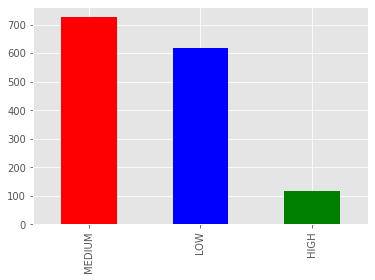

In [13]:
housePrice['PriceLabel'].value_counts().plot(kind = 'bar', color = ['red', 'blue', 'green'])
plt.show()

Balanced dataset shape: (345, 80)


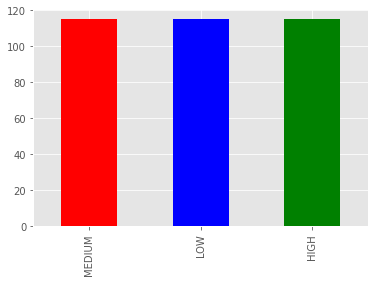

In [14]:
from sklearn.utils import resample
housePrice_low = housePrice[housePrice.PriceLabel=='LOW']
housePrice_medium = housePrice[housePrice.PriceLabel=='MEDIUM']
housePrice_high = housePrice[housePrice.PriceLabel=='HIGH']
housePrice_low_downsampled = resample(housePrice_low,
                                   replace=False,
                                   n_samples=len(housePrice_high),
                                   random_state=42)

housePrice_medium_downsampled = resample(housePrice_medium,
                                   replace=False,
                                   n_samples=len(housePrice_high),
                                   random_state=42)

housePrice_balanced = pd.concat([housePrice_low_downsampled, housePrice_high,housePrice_medium_downsampled])

print(f'Balanced dataset shape: {housePrice_balanced.shape}')
housePrice_balanced['PriceLabel'].value_counts().plot(kind = 'bar', color = ['red', 'blue', 'green'])
plt.show()

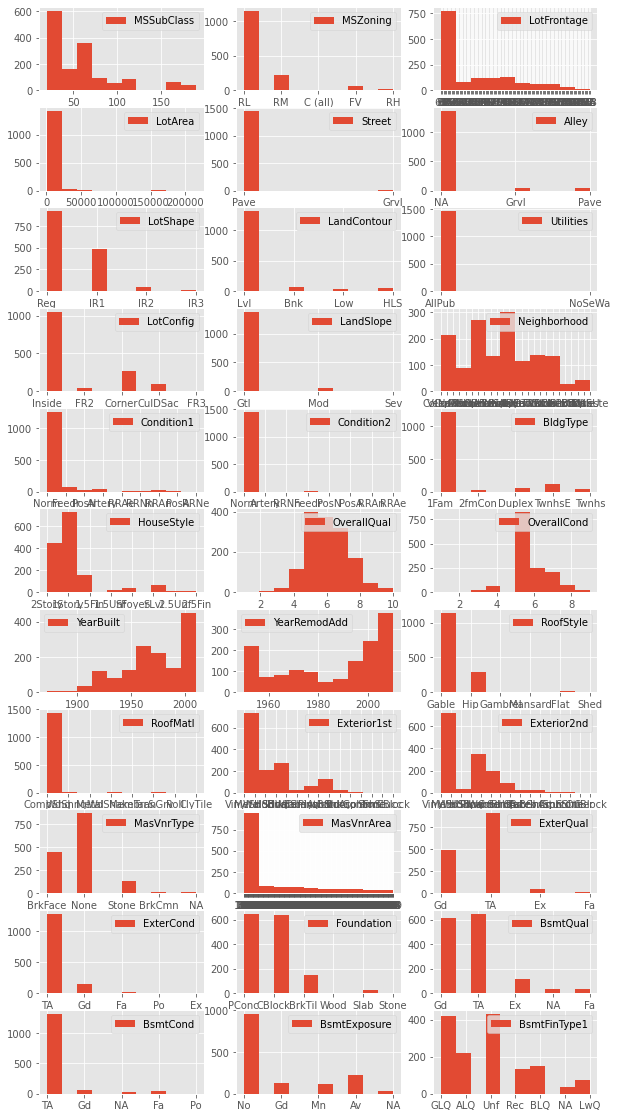

In [15]:
# set the value to object which shows in number(eg. MSSubClass is number but represent as catagory)
housePrice['MSSubClass'] = housePrice['MSSubClass'].astype(object)
    

# plot the Histogram
fig, ax = plt.subplots(11, 3, figsize = (10, 20))
series_list = []
for col in housePrice.columns:
    series_list.append(housePrice[col])
index = 0
for i in range(11):
    for j in range(3):
        series_list[index].hist(ax = ax[i, j], legend=True)
        index += 1
plt.show()

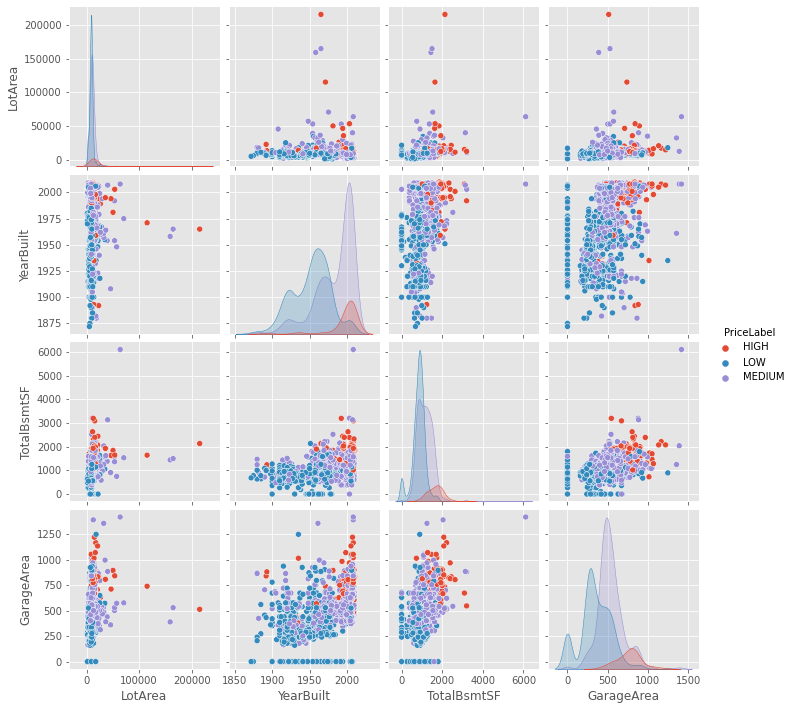

In [16]:
data = housePrice[['LotFrontage', 'LotArea', 'YearBuilt', 'TotalBsmtSF', 'GarageArea','Neighborhood','PriceLabel']]
sn.pairplot(data, hue = 'PriceLabel')
plt.show()

In [ ]:
plt.figure(figsize = (15, 15))
sn.heatmap(housePrice.corr(), annot=True, cmap='magma', fmt='.2f')
plt.show()

In [ ]:
# 6.2 box plot
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sn.boxplot(y = 'GrLivArea', x = 'PriceLabel', data = housePrice, ax = ax[0])
sn.boxplot(y = 'GarageArea', x = 'PriceLabel', data = housePrice, ax = ax[1])

plt.show()

# Data preparation

## 1. Data Cleaning
### 1.1 Fill in missing values

In [ ]:
housePrice.isnull().sum()

**There does not exist missing value**

### 1.2. Identify and remove noise

In [ ]:
housePrice.dtypes

In [ ]:
# find out if the str attribute are same to the author's version. 
for column in housePrice:
    if(housePrice.dtypes[column] == 'object'):
        columnSeriesObj = housePrice[column]
        unique_list = list(set(columnSeriesObj.values))
        #print(column , ":",unique_list)

In [ ]:
housePrice['LotFrontage'].replace('NA', 0, inplace=True)
housePrice['LotFrontage'] = housePrice['LotFrontage'].astype(float)
housePrice['LotFrontage'].replace(0, housePrice['LotFrontage'].mean(), inplace=True)

housePrice['MasVnrArea'].replace('NA', 0, inplace=True)
housePrice['MasVnrArea'] = housePrice['MasVnrArea'].astype(float)
housePrice['MasVnrArea'].replace(0, housePrice['MasVnrArea'].mean(), inplace=True)

housePrice['GarageYrBlt'].replace('NA', 0, inplace=True)
housePrice['GarageYrBlt'] = housePrice['GarageYrBlt'].astype(float)
housePrice['GarageYrBlt'].replace(0, housePrice['GarageYrBlt'].mean(), inplace=True)


    
    
# find out if the str attribute are same to the author's version. 
# Check the result again
for column in housePrice:
    if(housePrice.dtypes[column] == 'object'):
        columnSeriesObj = housePrice[column]
        unique_list = list(set(columnSeriesObj.values))
        #print(column , ":",unique_list)

In [ ]:
for column in housePrice:
    if(housePrice.dtypes[column] == 'int64'):
        columnSeriesObj = housePrice[column]
        unique_list = list(set(columnSeriesObj.values))
        #print(column , ":",unique_list)

### 1.3 correct inconsistencies
**Because there only one dataset, so does not exist inconsistencies problem.**

### 2. Data integration
#### 2.1 Merge data from multiple sources.

In [ ]:
import math

def entropy(labels):
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    # Convert labels to integers
    label_dict = {label: i for i, label in enumerate(set(labels))}
    labels = [label_dict[label] for label in labels]

    counts = np.bincount(labels)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.

    # Compute entropy
    for i in probs:
        ent -= i * math.log(i, n_classes)

    return ent

In [ ]:
# Feature Subset Selection - remove the irrelevant or redundant features

for val in housePrice:
    if(entropy(housePrice[val]) < 0.2):
        print(val)
        housePrice.drop([val], axis=1, inplace=True)

In [ ]:
housePrice.info()

In [ ]:
# Feature creation
# conbine OverallQual+OverallCond 
# OverallQual: Rates the overall material and finish of the house
# OverallCond: Rates the overall condition of the house
housePrice['OverallQualCond'] = housePrice['OverallQual'] + housePrice['OverallCond']
housePrice.drop(['OverallQual'], axis=1, inplace=True)
housePrice.drop(['OverallCond'], axis=1, inplace=True)

# aggregation operation on quantitative attribute
# todo
housePrice.groupby(['YearBuilt']).mean()


In [ ]:
housePrice.dtypes

### 3. Data Transformation
#### 3.1 Normalization


In [ ]:
housePrice

## Modeling

### Random Forest

In [ ]:
models = []

In [ ]:
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = [f'{value}\n' for value in cf.flatten()]

    box_labels = [f'{v1}'.strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sn.heatmap(cf, annot=box_labels, fmt='', cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from joblib import dump
import random

X = housePrice.drop('PriceLabel', axis=1)
y = housePrice['PriceLabel']

ohe = OneHotEncoder()
X_encoded = ohe.fit_transform(X)
X = X_encoded

kf = KFold(n_splits=5)
# the n_estimators parameter specifies the number of decision trees in the random forest
rfc = RandomForestClassifier(n_estimators=30)
best_score = 0


for train_index, test_index in kf.split(X):
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train, X_test = X[train_index], X[test_index]

    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    if score > best_score:
        best_score = score
        best_model = rfc
        print(best_score)
    
dump(best_model, 'random_forest.joblib')

In [ ]:
from sklearn.metrics import confusion_matrix
import joblib

# Load the saved model
model = joblib.load('random_forest.joblib')

# Predict the test data
y_pred = model.predict(X_test)

models.append(("Random Forest", model, model.predict_proba(X_test), y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix\n',cm)


In [ ]:
categories = ['LOW', 'MEDIUM', 'HIGH']
print("Random Forest")
make_confusion_matrix(confusion_matrix(y_test, y_pred), categories=categories, cmap='binary')

In [ ]:
#print('Accuracy:', accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Randomforest report')
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

one_hot_encoding = np.array(pd.get_dummies(y_test, columns = ['PriceLabel']))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()

    fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], model.predict_proba(X_test)[:, i])
        
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=5, label="Random Forest" + f' (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show() 

### Neural Network

Converting categorical values into numeric using the sklearn library and in particular the OneHotEncoding class

In [ ]:
X = housePrice.drop('PriceLabel', axis=1)
y = housePrice['PriceLabel']

ohe = OneHotEncoder()
X_encoded = ohe.fit_transform(X)
X = X_encoded

Creating a training set and a test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

Creation of the neural network with parameters tested on different ranges. As an activation function we use 'relu' because it fits better with our training set as a solver we use 'sgd'. The parameters alpha, can be used to control possible 'overfitting' and 'underfitting has been chosen over a range as well as tolerance.

mlp.fit allows you to fit the model to the training data
mlp.predict allows you to predict the training and test set

In [ ]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(5,5), 
                        activation='relu', 
                        random_state=1,
                        alpha=0.030888435964774818,
                        max_iter=500,
                        solver='sgd', 
                        tol=1e-5,
                        learning_rate_init=0.1, 
                        verbose=False)

mlp.fit(X_train,y_train)

predict_train_mlp = mlp.predict(X_train)
predict_test_mlp = mlp.predict(X_test)

models.append(("Neural Network", mlp, mlp.predict_proba(X_test), y_test, mlp.predict(X_test)))

In [ ]:
from sklearn.metrics import classification_report
print("PREDICTION TRAINING SET")
print(confusion_matrix(y_train,predict_train_mlp))
print(classification_report(y_train,predict_train_mlp))

In [ ]:
print("PREDICTION TEST SET")
print(confusion_matrix(y_test,predict_test_mlp))
print(classification_report(y_test,predict_test_mlp))

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, predict_test_mlp):.2f}')

#### Evaluation Neural Network

In [ ]:
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = [f'{value}\n' for value in cf.flatten()]

    box_labels = [f'{v1}'.strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sn.heatmap(cf, annot=box_labels, fmt='', cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)

In [ ]:
categories = ['LOW', 'MEDIUM', 'HIGH']
print("Neural Network")
make_confusion_matrix(confusion_matrix(y_test, predict_test_mlp), categories=categories, cmap='binary')

In [ ]:
print('Classification report')
print(classification_report(y_test, predict_test_mlp))

Compute the Roc Curve for each class

In [ ]:
one_hot_encoding = np.array(pd.get_dummies(y_test, columns = ['PriceLabel']))

In [ ]:
probs = {}

probs["Neural Network"] = mlp.predict_proba(X_test)

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()

    fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs["Neural Network"][:, i])
        
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=3, label="Neural Network" + f' (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show()  

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
m = 0
for i in range(len(np.unique(y))):
    plt.figure()

    fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs["Neural Network"][:, i])
        
    print(one_hot_encoding[:, i])
    print(probs["Neural Network"][:, i])
        
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=5, label="" + f' (area = {roc_auc[i]:.2f})')
    m += 1
        
    if m==2:
        break
    break

In [ ]:
one_hot_encoding[:, 0]

In [ ]:
probs["Neural Network"][:, 0]

In [ ]:
roc_curve(one_hot_encoding[:, 0], probs["Neural Network"][:, 0])

### Adaboost

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
#Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=110, learning_rate=1)

# Train Adaboost Classifer
abc = abc.fit(X_train, y_train)

models.append(("AdaBoost", abc, abc.predict_proba(X_test), y_test, abc.predict(X_test)))

#Predict the response for test dataset
y_pred = abc.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
predict_train_abc = abc.predict(X_train)
predict_test_abc = abc.predict(X_test)

In [ ]:
categories = ['LOW', 'MEDIUM', 'HIGH']
print("AdaBoost")
make_confusion_matrix(confusion_matrix(y_test, predict_test_abc), categories=categories, cmap='binary')

In [ ]:
print('Classification report')
print(classification_report(y_test, predict_test_abc))

In [ ]:
probs["AdaBoost"] = abc.predict_proba(X_test)

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()

    fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs["AdaBoost"][:, i])
        
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=5, label="AdaBoost" + f' (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show() 

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()

    fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs["AdaBoost"][:, i])
        
    print(one_hot_encoding[:, i])
    print(probs["AdaBoost"][:, i])
        
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=5, label="" + f' (area = {roc_auc[i]:.2f})')
    m += 1
        
    if m==2:
        break
    break

In [ ]:
one_hot_encoding[:, 0]

In [ ]:
probs["AdaBoost"][:, 0]

In [ ]:
roc_curve(one_hot_encoding[:, 0], probs["AdaBoost"][:, 0])

## Evaluation

In [ ]:
import operator

accuracy = {}

for model in models:
    accuracy[model[0]] = metrics.accuracy_score(model[3], model[4])
    
sorted_accuracy = sorted(accuracy.items(), key=operator.itemgetter(1), reverse=True)

for x in sorted_accuracy:
     print("Accuracy " + str(x[0]) + ": " + str(x[1]))

Compare roc curve models

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()
    for model in models:
            one_hot_encoding = np.array(pd.get_dummies(model[3], columns = ['PriceLabel']))
        
            fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], model[2][:, i])

            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], lw=5, label=model[0] + f' (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show()  

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()

    for model in models:
        one_hot_encoding = np.array(pd.get_dummies(model[3], columns = ['PriceLabel']))
        
        fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], model[2][:, i])
        
        print(one_hot_encoding[:, i])
        
        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.plot(fpr[i], tpr[i], lw=5, label=model[0] + f' (area = {roc_auc[i]:.2f})')
    break


#### Business goal
###### Find the attributes correlated to the price of the houses

We will restrict our analysis to the continuous attributes, although it would be possible to extend the analysis to the non-continuous ones; the company wants to know te attributes non-continous?

In [ ]:
numerical = [col for col in housePrice.columns if housePrice[col].dtypes != 'O']

print(len(numerical))

numerical

Not all the numerical features are real, because the features that refers to years aren't numerical, so we'll remove it

In [ ]:
real_numerical = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                  'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                  'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PriceLabel']

# remove the irrelevant or redundant features
irrelevant_features = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'BsmtFinSF2', 'Heating', 'Electrical',
                       'LowQualFinSF', 'KitchenAbvGr', 'Functional', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                       'PoolQC', 'MiscFeature', 'MiscVal']

real_numerical = [feature for feature in real_numerical if (feature not in irrelevant_features )]

print(len(real_numerical))

for i in real_numerical:
    count = 0
    for j in housePrice.columns:
        if(i == j):
            count += 1
    if(count != 1):
        print("Non trovato numerical :" + str(i) + " "+ str(count))

We'll consider the data of the numerical features that we selected above

In [ ]:
housePriceNumerical = housePrice[real_numerical]

print(len(housePriceNumerical.columns))

housePriceNumerical.dtypes

Le'ts check if there are some categorical attributes in our numerical data

In [ ]:
categorical = [col for col in housePriceNumerical.columns if housePriceNumerical[col].dtypes.name == 'category' and col != "PriceLabel"]

print(len(categorical))

categorical

In [ ]:
X = housePriceNumerical.drop('PriceLabel', axis=1)
y = housePriceNumerical['PriceLabel']

Split data into separate training and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Check the shape of X_train and X_test

In [ ]:
X_train.shape, X_test.shape

Encoding categorical attributes

In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OneHotEncoder(cols=categorical)

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

Check the shape of X_train and X_test

In [ ]:
X_train.shape, X_test.shape

In [ ]:
cols = X_train.columns

Feature Scaling

We should map all the feature variables into the same scale. It is called feature scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

Create the model

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

View the feature scores

In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

###### + Categorical

Let consider the categorical attributes to encoding

In [ ]:
categorical = [col for col in housePrice.columns if housePrice[col].dtypes == 'O']

print(len(categorical))

categorical

Take the real categorical attributes, because some numerical features are fake numerical

In [ ]:
real_categorical = [col for col in housePrice.columns if col not in real_numerical]

print(len(real_categorical))

real_categorical

Split data into separate training and test set

In [ ]:
X = housePrice.drop('PriceLabel', axis=1)
y = housePrice['PriceLabel']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Check the shape of X_train and X_test

In [ ]:
X_train.shape, X_test.shape

Encode categorical variables

In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OneHotEncoder(cols=real_categorical)

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

Check the shape of X_train and X_test

In [ ]:
X_train.shape, X_test.shape

Feature Scaling

We should map all the feature variables into the same scale. It is called feature scaling

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

View the feature scores

In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores